In [89]:
# Import Pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
# Hotel booking demand
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
dataSetPath = 'datasets/hotel_bookings.csv'

# Read dataset with pandas
data = pd.read_csv(dataSetPath)
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [91]:
# Handle null values
data['agent'].fillna(0.0, inplace=True)
data['company'].fillna(0.0, inplace=True)
data['children'].fillna(0.0, inplace=True)

# Replace country with "mode"
data['country'].fillna(data.country.mode().to_string(), inplace=True)

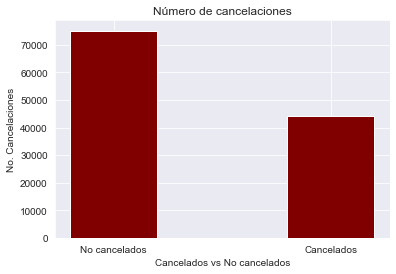

In [93]:
# Get number of cancellations
series = data['is_canceled'].value_counts()
x = series.index.values
y = (series/series.sum()*100).values

plt.bar(['No cancelados', 'Cancelados'], [series[0], series[1]], color='maroon', width=0.4)
plt.xlabel("Cancelados vs No cancelados")
plt.ylabel("No. Cancelaciones")
plt.title("Número de cancelaciones")
plt.show()


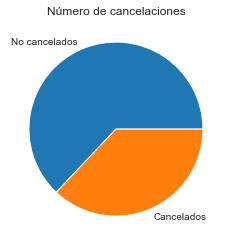

In [102]:
# Draw a pie chart for cancellations
plt.pie([series[0], series[1]], labels=['No cancelados', 'Cancelados'])
plt.title("Número de cancelaciones")
plt.show()


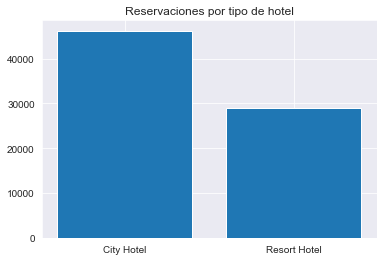

In [123]:
# Number of reservations per type of hotel
# Get only dat with "is_canceled" => 0 (not cancelled)
dataNotCancel = data[data['is_canceled'] == 0]

# Get reservations by "hotel type"
seriesNotC = dataNotCancel['hotel'].value_counts()

plt.bar(seriesNotC.index.values, seriesNotC.values)
plt.title("Reservaciones por tipo de hotel")
plt.show()


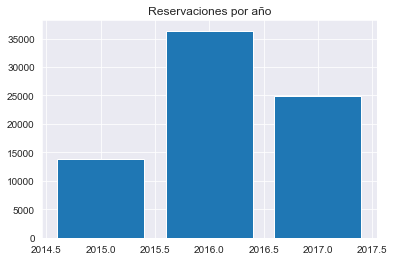

In [125]:
# Number of reservations per year
# Get reservations by "hotel type"
seriesYear = dataNotCancel['arrival_date_year'].value_counts()
plt.bar(seriesYear.index.values, seriesYear.values)
plt.title("Reservaciones por año")
plt.show()
